# **Prac 8: SOM**
José Luis Haro Díaz

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from google.colab import drive

In [3]:
drive.mount('/content/drive')

#Path
image_path = '/content/drive/MyDrive/Colab Notebooks/Aprendizaje - Máquina/datasets/chivas.png'

#Cargar imagen y preprocesarla
image = Image.open(image_path).convert('RGB')
image = image.resize((50, 50))  #Redimensionar para reducir cómputo

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


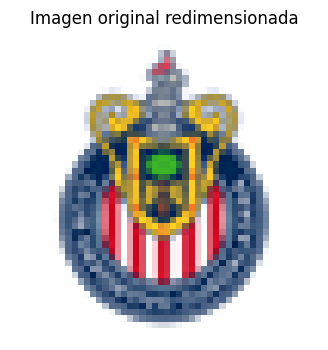

In [4]:
#Mostrar imagen original redimensionada
plt.figure(figsize=(4, 4))
plt.imshow(image)
plt.title("Imagen original redimensionada")
plt.axis('off')
plt.show()

data_rgb = np.array(image).reshape(-1, 3) / 255.0

In [5]:
#Inicializar pesos del SOM
def initialize_weights(x_dim, y_dim, input_dim):
    return np.random.rand(x_dim, y_dim, input_dim)

In [6]:
#Encontrar la neurona ganadora (BMU)
def find_bmu(input_vector, weights):
    distances = np.sqrt(((weights - input_vector) ** 2).sum(axis=2))
    return np.unravel_index(np.argmin(distances), distances.shape)

#Actualizar pesos
def update_weights(input_vector, weights, bmu_index, t, max_iter, init_lr=0.5, init_radius=3):
    learning_rate = init_lr * (1 - t / max_iter)
    radius = init_radius * (1 - t / max_iter)
    x_dim, y_dim, _ = weights.shape
    for i in range(x_dim):
        for j in range(y_dim):
            dist_to_bmu = np.sqrt((i - bmu_index[0]) ** 2 + (j - bmu_index[1]) ** 2)
            if dist_to_bmu <= radius:
                influence = np.exp(-dist_to_bmu ** 2 / (2 * radius ** 2))
                weights[i, j] += learning_rate * influence * (input_vector - weights[i, j])

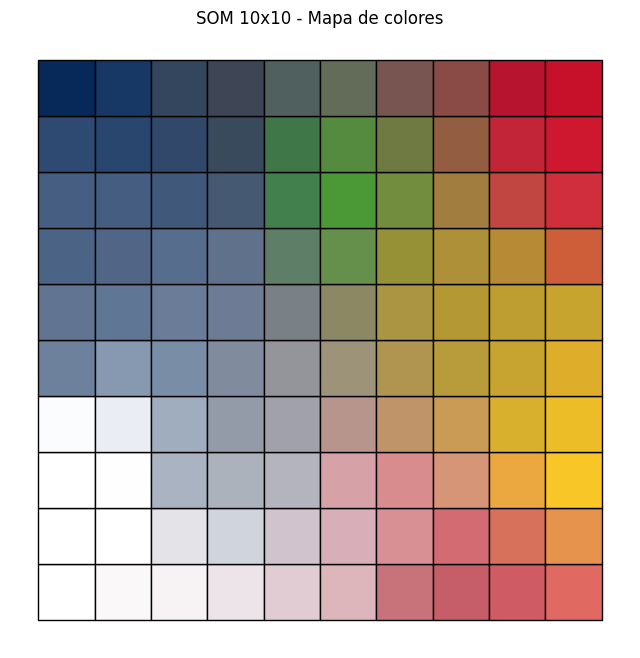

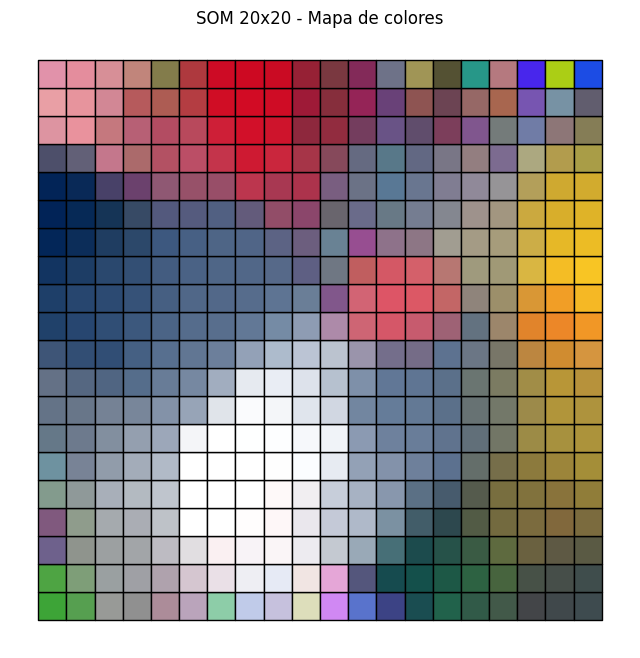

In [7]:
#Entrenar SOM
def train_som(data, x_dim, y_dim, max_iter=1000):
    weights = initialize_weights(x_dim, y_dim, 3)
    for t in range(max_iter):
        input_vector = data[np.random.randint(len(data))]
        bmu_index = find_bmu(input_vector, weights)
        update_weights(input_vector, weights, bmu_index, t, max_iter)
    return weights

#Visualizar mapa SOM
def plot_som(weights, title):
    x_dim, y_dim, _ = weights.shape
    plt.figure(figsize=(8, 8))
    for i in range(x_dim):
        for j in range(y_dim):
            color = weights[i, j]
            plt.fill_between([i, i+1], [j, j], [j+1, j+1], color=color, edgecolor='k')
    plt.title(title)
    plt.axis('off')
    plt.show()

#SOM de 10x10
weights_10x10 = train_som(data_rgb, 10, 10, max_iter=1000)
plot_som(weights_10x10, "SOM 10x10 - Mapa de colores")

# SOM de 20x20
weights_20x20 = train_som(data_rgb, 20, 20, max_iter=1500)
plot_som(weights_20x20, "SOM 20x20 - Mapa de colores")